In [1]:
import pandas as pd
import numpy as np

In [2]:
df_test = pd.read_csv(r"C:\Users\Franco Gabriel\Downloads\merged\merge_test.csv")


In [3]:
df_train = pd.read_csv(r"C:\Users\Franco Gabriel\Downloads\merged\merge_train.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307499 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   YEARS_OLD                    307511 non-null  int64  
 9   YEARS_EMPLOYED               307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  OWN_CAR_AGE                  104582 non-null  float64
 13 

In [5]:
df_train.shape

(307511, 83)

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 131 entries, SK_ID_CURR to COMPLETED
dtypes: float64(75), int64(40), object(16)
memory usage: 48.7+ MB


In [7]:
df_train.OCCUPATION_TYPE_encoded.max()

18

In [8]:
df_train.drop(['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
               'YEARS_BEGINEXPLUATATION_AVG',
               'YEARS_BUILD_AVG','COMMONAREA_AVG',
               'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
               'FLOORSMIN_AVG','LANDAREA_AVG',
               'LIVINGAPARTMENTS_AVG',
               'LIVINGAREA_AVG',
               'NONLIVINGAPARTMENTS_AVG',
               'NONLIVINGAREA_AVG' ],axis=1, inplace=True)

In [9]:
df_train.columns


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'YEARS_OLD', 'YEARS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE_encoded',
       'CODE_GENDER_encoded', 'FLAG_OWN_CAR_encoded',
       'FLAG_OWN_REALTY_encoded', 'NAME_TYPE_SUITE_encoded',
    

In [10]:
for col in df_test.columns:
    if not col in df_train:
        df_test.drop([f'{col}'], axis=1, inplace=True)

In [11]:
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns

df_train = df_train.drop(columns=categorical_columns)


In [12]:
#OLD_CAR also stands for those cases which the person does not owe a car
df_train['OLD_CAR'] = np.where(df_train['OWN_CAR_AGE'] < 5, 0, 1)


In [13]:
df_train.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'OWN_CAR_AGE'], inplace=True)

In [14]:
'''
CNT_INSTALMENT_MAX              media
DAYS_PST_DUE_MAX                0
AMT_LARGEST_RECORDED_DEBT      0
DAYS_SINCE_LAST_APPLICATION     -3000
AMT_CREDIT_MAX                media
AMT_CREDIT_SUM_DEBT             0
CNT_CREDIT_PROLONG_MAX          0
ACTIVE                          0
BAD_DEBT                        0
COMPLETED                       0
OBS_30_CNT_SOCIAL_CIRCLE         0
DEF_30_CNT_SOCIAL_CIRCLE         0
OBS_60_CNT_SOCIAL_CIRCLE         0
DEF_60_CNT_SOCIAL_CIRCLE         0
'''
cols = ['DAYS_PST_DUE_MAX','AMT_LARGEST_RECORDED_DEBT','AMT_CREDIT_SUM_DEBT','CNT_CREDIT_PROLONG_MAX','ACTIVE','BAD_DEBT','COMPLETED','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS']
df_train[cols] = df_train[cols].fillna(0)
print(df_train[cols].isna().sum())
      
cols_for_mean = ['CNT_INSTALMENT_MAX','AMT_CREDIT_MAX']

for cols in cols_for_mean:
    
    df_train[cols] = df_train[cols].fillna(df_train[cols].mean())
df_train['DAYS_SINCE_LAST_APPLICATION'] = df_train['DAYS_SINCE_LAST_APPLICATION'].fillna(-3000)
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].fillna(-3000)


DAYS_PST_DUE_MAX             0
AMT_LARGEST_RECORDED_DEBT    0
AMT_CREDIT_SUM_DEBT          0
CNT_CREDIT_PROLONG_MAX       0
ACTIVE                       0
BAD_DEBT                     0
COMPLETED                    0
OBS_30_CNT_SOCIAL_CIRCLE     0
DEF_30_CNT_SOCIAL_CIRCLE     0
OBS_60_CNT_SOCIAL_CIRCLE     0
DEF_60_CNT_SOCIAL_CIRCLE     0
AMT_GOODS_PRICE              0
AMT_ANNUITY                  0
CNT_FAM_MEMBERS              0
dtype: int64


In [15]:
#To fill the Nan values from EXT_SOURCE_1, EXT_SOURCE_2,EXT_SOURCE_3, 0.5 will be the default value:

df_train['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(0.5)
df_train['EXT_SOURCE_2'] = df_train['EXT_SOURCE_2'].fillna(0.5)
df_train['EXT_SOURCE_3'] = df_train['EXT_SOURCE_3'].fillna(0.5)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['TARGET']) 
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
X.isna().sum()

SK_ID_CURR                     0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
YEARS_OLD                      0
YEARS_EMPLOYED                 0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
NAME_CONTRACT_TYPE_encoded     0
CODE_GENDER_encoded            0
FLAG_OWN_C

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)

# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MaE: {mae:.4f}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")


MSE: 0.0807
MaE: 0.0807
RMSE: 0.2841
R²: -0.0864


In [20]:
importances = rf.feature_importances_  # Extraer importancia de cada feature
feature_names = X.columns  # Obtener nombres de las columnas

# Ordenar las features por importancia
sorted_indices = importances.argsort()[::-1]

# Mostrar las features con sus importancias
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


EXT_SOURCE_2: 0.0698
EXT_SOURCE_3: 0.0591
DAYS_REGISTRATION: 0.0478
DAYS_ID_PUBLISH: 0.0478
SK_ID_CURR: 0.0463
AMT_ANNUITY: 0.0427
DAYS_LAST_PHONE_CHANGE: 0.0414
DAYS_SINCE_LAST_APPLICATION: 0.0408
AMT_CREDIT: 0.0390
AMT_CREDIT_MAX: 0.0378
REGION_POPULATION_RELATIVE: 0.0362
AMT_INCOME_TOTAL: 0.0351
YEARS_OLD: 0.0349
EXT_SOURCE_1: 0.0344
AMT_GOODS_PRICE: 0.0324
AMT_CREDIT_SUM_DEBT: 0.0303
CNT_INSTALMENT_MAX: 0.0289
ORGANIZATION_TYPE_encoded: 0.0261
YEARS_EMPLOYED: 0.0250
OCCUPATION_TYPE_encoded: 0.0207
ACTIVE: 0.0201
AMT_LARGEST_RECORDED_DEBT: 0.0186
OBS_60_CNT_SOCIAL_CIRCLE: 0.0161
OBS_30_CNT_SOCIAL_CIRCLE: 0.0160
DAYS_PST_DUE_MAX: 0.0142
NAME_FAMILY_STATUS_encoded: 0.0136
CNT_FAM_MEMBERS: 0.0134
CNT_CHILDREN: 0.0092
NAME_TYPE_SUITE_encoded: 0.0086
NAME_HOUSING_TYPE_encoded: 0.0081
NAME_EDUCATION_TYPE_encoded: 0.0077
NAME_INCOME_TYPE_encoded: 0.0074
DEF_30_CNT_SOCIAL_CIRCLE: 0.0066
FLAG_OWN_REALTY_encoded: 0.0065
REGION_RATING_CLIENT_W_CITY: 0.0061
CODE_GENDER_encoded: 0.0060
REGION_RA

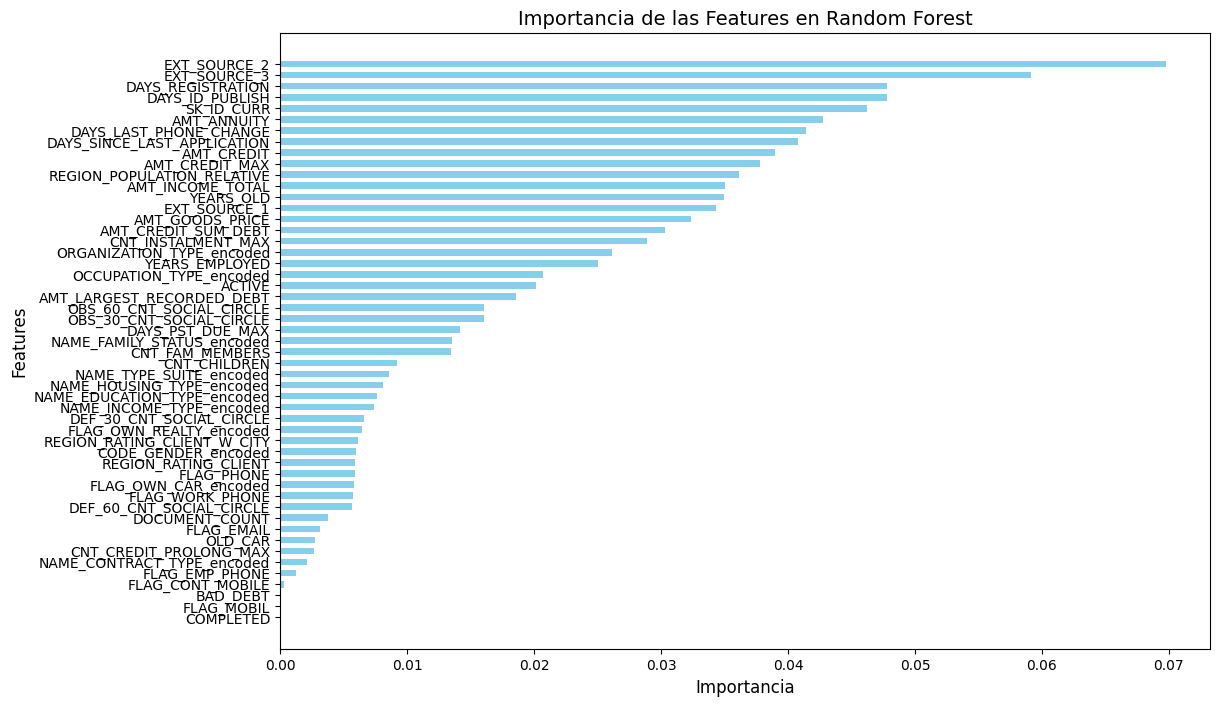

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Aumentamos el tamaño de la figura
plt.barh(feature_names[sorted_indices], importances[sorted_indices], 
         color="skyblue", height=0.6)  # Reduce el grosor de las barras para más espacio

plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Importancia de las Features en Random Forest", fontsize=14)

plt.gca().invert_yaxis()  # Para que la más importante aparezca arriba
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Ajustar tamaño y evitar rotaciones en etiquetas

plt.show()

In [22]:
#Los valores obtenidos son muy bajos, y no representan una importancia significativa considerable en el desarrollo del modelo->
#Hay que mejorar los resultados obtenidos.
df_train.to_csv('df_train_final.csv', index=False)

In [23]:
from sklearn.metrics import classification_report, f1_score, recall_score

f1 = f1_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)

print(f"F1-score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

# También podés ver un reporte completo
print(classification_report(y_test, y_pred))

F1-score: 0.0056
Recall: 0.0028
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56533
           1       0.67      0.00      0.01      4970

    accuracy                           0.92     61503
   macro avg       0.79      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503



In [24]:
#A partir de esta celda, haremos un ensemble de modelos para mejorar las predicciones del RF, pero, para ello, primero se
#aplicará un SMOTE para balancear la muestra
from imblearn.over_sampling import SMOTE

# Solo se aplica SMOTE a los datos de entrenamietno:
smote = SMOTE(sampling_strategy='auto', random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#Veamos cuán parejos están nuestros datos ahora:
print(pd.Series(y_train_resampled).value_counts())

TARGET
0    226153
1    226153
Name: count, dtype: int64


In [26]:
#Comenzaremos utilizando  stacking, y consta en entrenar múltiples modelos base (en este caso Random Forest y XGBoost)
#y luego usás otro modelo (como una regresión logística en este caso) para combinar sus predicciones.

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=1)),
    ('xgb', XGBClassifier(n_estimators=100, eval_metric='logloss'))
]
lr = LogisticRegression(max_iter=1000)
stack = StackingClassifier(estimators=base_models, final_estimator=lr, passthrough=True)
stack.fit(X_train_resampled, y_train_resampled)
y_pred = stack.predict(X_test)

print("Accuracy en test:", stack.score(X_test, y_test))

c:\users\franco gabriel\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy en test: 0.5996130270068126


In [29]:
#Métricas para medir la eficacia del modelo obtenido al utilizar stacking:
from sklearn.metrics import roc_auc_score
#Utilizamos y_prob porque el método se aplica a probabilidades, no al valor numérico de la clase.
y_prob = stack.predict_proba(X_test)[:, 1]

f1_stacking = f1_score(y_test, y_pred)
recall_stacking = recall_score(y_test, y_pred)
auc_stacking = roc_auc_score(y_test, y_prob)

print(f"F1-score: {f1_stacking:.4f}")
print(f"Recall: {recall_stacking:.4f}")
print(f"AUC-ROC: {auc_stacking:.4f}")

print(classification_report(y_test, y_pred))

F1-score: 0.1858
Recall: 0.5654
AUC-ROC: 0.6171
              precision    recall  f1-score   support

           0       0.94      0.60      0.73     56533
           1       0.11      0.57      0.19      4970

    accuracy                           0.60     61503
   macro avg       0.53      0.58      0.46     61503
weighted avg       0.87      0.60      0.69     61503



In [ ]:
#Los resultados obtenidos con las distintas métrica nos indican que el modelo todavía presenta dificultades:
'''
Alta recall, baja precisión ---> el modelo detecta bien la clase 1, pero con muchos falsos positivos.
Baja AUC-ROC (0.6171) ---> Indica que el modelo apenas supera el azar.
'''